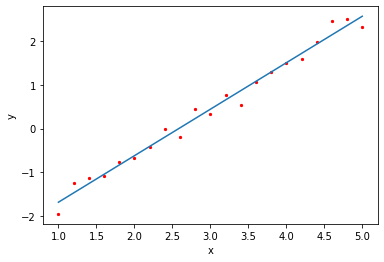

In [19]:
import numpy as np
import matplotlib.pyplot as plt


fn='sample1.txt' 
x,y=np.loadtxt(fn,unpack=True,usecols=[0,1])


sigma = 1
S = len(x)/(sigma**2)
Sx = np.sum(x/(sigma**2))
Sy = np.sum(y/sigma**2)
Sxx=np.sum((x**2/sigma**2))
Sxy = np.sum((x*y)/sigma**2)

delta = S*Sxx-Sx**2

a = (Sxx*Sy-Sx*Sxy)/delta
b = (S*Sxy-Sx*Sy)/delta

def  f(x, a, b):
    return b+a*x

plt.scatter(x,y, color ='red', s=5)
plt.plot(x,f(x,b,a))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [26]:
fn = 'sample1.txt'
x,y=np.loadtxt(fn,unpack=True,usecols=[0,1])
c=len(x)
A =np.vstack([x,np.ones(c)])
w =np.linalg.lstsq(A,T,y)
print(w)

NameError: name 'chisq' is not defined

In [34]:
fn = 'sample1.txt' 
x, y = np.loadtxt(fn,unpack=True,usecols=[0,1])
coeff, res, _, _, _=np.polyfit(x,y,1,full=True) 
print (coeff)
print (res) # residual = chisq

[ 1.06338312 -2.74605411]
[0.61609529]


In [33]:
fn = 'sample1.txt' 
x, y = np.loadtxt(fn,unpack=True,usecols=[0,1])

coeff, res, _, _, _=np.polyfit(x,y,1,w=1/sig_y) 
print (coeff)
print (res)

TypeError: expected a 1-d array for weights

[ 1.14609969 -2.09848266]
[ 1.0922703  -1.59888375]


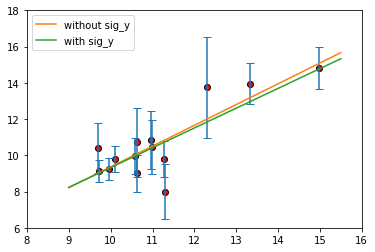

In [63]:
fn = 'sample2.txt' 
x, y, sig_y= np.loadtxt(fn,unpack=True,usecols=[0,1,2])
coeff, res, _, _, _=np.polyfit(x,y,1,full=True) 
coeff2 = np.polyfit(x,y,1,w=1/sig_y) 

plt.scatter(x, y, color='red', edgecolor='black')
plt.errorbar(x,y,yerr=sig_y, linestyle='None', capsize=4)
t= np.linspace(9, 15.5, 100)
plt.plot(t, coeff[1]+coeff[0]*t, label='without sig_y')
plt.plot(t, coeff2[1]+coeff2[0]*t , label ='with sig_y')
plt.xlim(8, 16)
plt.ylim(6, 18)
print(coeff)
print(coeff2)

plt.legend()

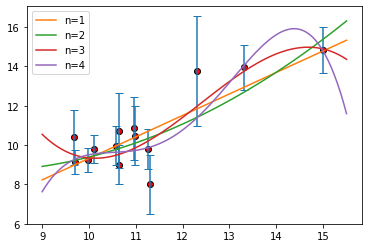

In [75]:
import pandas as pd 
fn = 'sample2.txt' 
x, y, sig_y= np.loadtxt(fn,unpack=True,usecols=[0,1,2])
coeff1= np.polyfit(x,y,1,w=1/sig_y) 
coeff2= np.polyfit(x,y,2,w=1/sig_y) 
coeff3 = np.polyfit(x,y,3,w=1/sig_y) 
coeff4 = np.polyfit(x,y,4,w=1/sig_y) 

poly1=np.poly1d(coeff1)
poly2=np.poly1d(coeff2)
poly3=np.poly1d(coeff3)
poly4=np.poly1d(coeff4)


plt.scatter(x, y, color='red', edgecolor='black')
plt.errorbar(x,y,yerr=sig_y, linestyle='None', capsize=4)
t= np.linspace(9, 15.5, 100)
plt.plot(t, poly1(t), label='n=1')
plt.plot(t, poly2(t), label='n=2')
plt.plot(t, poly3(t), label = 'n=3')
plt.plot(t, poly4(t), label = 'n=4')

plt.legend()

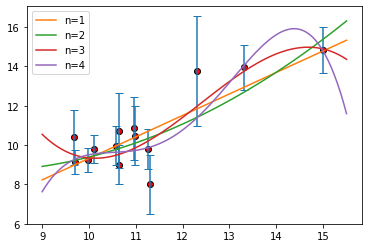

,n,residuals
0,1,[8.04789643838689]
1,2,[7.188186764408832]
2,3,[5.6084240982797]
3,4,[4.973633642399793]


In [79]:
import pandas as pd 
fn = 'sample2.txt' 
x, y, sig_y= np.loadtxt(fn,unpack=True,usecols=[0,1,2])
coeff1, res1, _, _, _ = np.polyfit(x,y,1,w=1/sig_y, full = True) 
coeff2, res2, _, _, _ = np.polyfit(x,y,2,w=1/sig_y, full = True) 
coeff3, res3, _, _, _ = np.polyfit(x,y,3,w=1/sig_y, full = True) 
coeff4, res4, _, _, _ = np.polyfit(x,y,4,w=1/sig_y, full = True) 

poly1=np.poly1d(coeff1)
poly2=np.poly1d(coeff2)
poly3=np.poly1d(coeff3)
poly4=np.poly1d(coeff4)


plt.scatter(x, y, color='red', edgecolor='black')
plt.errorbar(x,y,yerr=sig_y, linestyle='None', capsize=4)
t= np.linspace(9, 15.5, 100)
plt.plot(t, poly1(t), label='n=1')
plt.plot(t, poly2(t), label='n=2')
plt.plot(t, poly3(t), label = 'n=3')
plt.plot(t, poly4(t), label = 'n=4')
plt.legend()
plt.show()

n = [1,2,3,4]
residuals = [res1, res2, res3, res4]

table1 = pd.DataFrame(n, columns=['n'])
table1['residuals'] = residuals
table1

Beta: [-2.31313317  1.16626906]
Beta Std Error: [1.59071258 0.14809942]
Beta Covariance: [[ 5.03161581 -0.46449257]
 [-0.46449257  0.04361448]]
Residual Variance: 0.5028934225235592
Inverse Condition #: 0.001198956292748224
Reason(s) for Halting:
  Sum of squares convergence


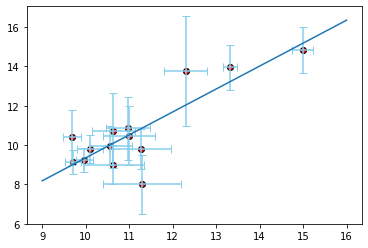

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *

fn = 'MagellanTemp.txt'
x, y, xerr, yerr = np.loadtxt(fn, unpack=True, usecols=[0,1,2,3])

def line_func(p,x):
    return p[0] + p[1]*x


line_model = Model(line_func)

data = RealData(x, y, sx=xerr, sy = yerr)

odr=ODR(data, line_model, beta0 = [0, 1])

out =odr.run()
out.pprint()

plt.scatter(x, y, color='red', edgecolor='black')
plt.errorbar(x,y,yerr = yerr, linestyle='None', capsize=4, color = 'skyblue')
plt.errorbar(x, y, xerr = xerr, linestyle='None', capsize=4, color = 'skyblue')

t = np.linspace(9, 16, 100)
plt.plot(t, out.beta[0]+out.beta[1]*t)

Beta: [ 3.17681913 -5.68977294 -7.93257939 -8.13093209]
Beta Std Error: [ 8.30243932 14.29183641 26.64759429 24.66919555]
Beta Covariance: [[ 10835.86705747 -18169.13890098 -31845.86694481 -31409.56416806]
 [-18169.13890098  32109.11387429  58740.11739771  55261.85013822]
 [-31845.86694481  58740.11739771 111626.74540709 101302.35531302]
 [-31409.56416806  55261.85013822 101302.35531302  95667.01484019]]
Residual Variance: 0.006361327466109831
Inverse Condition #: 7.165471290007026e-06
Reason(s) for Halting:
  Sum of squares convergence
Beta: [-1.37418439e-01  8.00000000e+02  2.01822500e+00  7.45259881e-02]
Beta Std Error: [0.29924595 0.         0.04253391 0.01255156]
Beta Covariance: [[ 1.07327877e+01  0.00000000e+00  7.29880025e-03 -3.99366953e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 7.29880025e-03  0.00000000e+00  2.16833563e-01 -5.35115002e-03]
 [-3.99366953e-02  0.00000000e+00 -5.35115002e-03  1.88821522e-02]]
Residual Variance: 0.0083434184208726

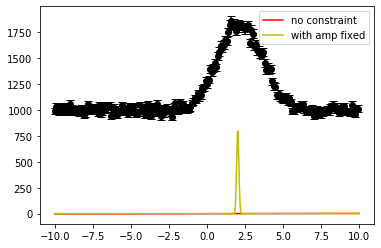

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *

fn = 'fakedata.dat'
time,r,rerr= np.loadtxt(fn,unpack=True,usecols=[0,1,2])

def gauss_func(p, x):
    xc = x - p[2]
    sig2 = p[3] **2
    return p[0]+p[1]*np.exp(-0.5*xc**2/sig2)

def gauss_func2(p, x):
    xc = x - p[2]
    sig2 = p[3] **2
    p[1] = 800
    return p[0]+p[1]*np.exp(-0.5*xc**2/sig2)

model = Model(gauss_func)
data = RealData(x,y,sy=rerr)
odr=ODR(data, model, beta0=[1000,1000,2,1])

out=odr.run()
out.pprint()
coeff = out.beta

model2 = Model(gauss_func2)
data2 = RealData(x,y,sy=rerr)
odr2=ODR(data2, model2, beta0=[1000,1000,2,1])

out2=odr2.run()
out2.pprint()
coeff2 = out2.beta

t = np.linspace(-10, 10, 1000)

plt.scatter(time, r, color='black', edgecolor='black')
plt.errorbar(time,r,yerr = rerr, linestyle='None', capsize=4, color = 'black')
plt.plot(t, gauss_func(coeff, t), 'r', label = 'no constraint')
plt.plot(t, gauss_func2(coeff2, t), 'y', label = 'with amp fixed')
plt.legend()

plt.show()



Beta: [-0.05395181 -0.08611537  0.06536881  0.10573871 -0.06435704]
Beta Std Error: [0.0009718  0.00163994 0.00219953 0.00403681 0.0050686 ]
Beta Covariance: [[ 2.63762715e-05  1.01252976e-05 -4.23526198e-05 -6.87747578e-05
   5.79151652e-05]
 [ 1.01252976e-05  7.51134375e-05 -6.98845910e-05 -4.50450306e-05
   8.95275211e-05]
 [-4.23526198e-05 -6.98845910e-05  1.35120829e-04  1.05482622e-04
  -1.53358588e-04]
 [-6.87747578e-05 -4.50450306e-05  1.05482622e-04  4.55134401e-04
  -3.95734055e-04]
 [ 5.79151652e-05  8.95275211e-05 -1.53358588e-04 -3.95734055e-04
   7.17526527e-04]]
Residual Variance: 0.03580448460321076
Inverse Condition #: 0.0691322079280681
Reason(s) for Halting:
  Parameter convergence


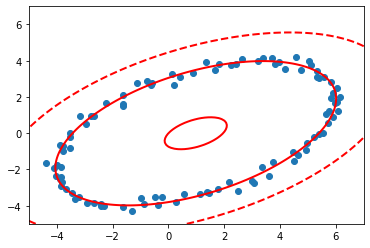

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *

fn = 'ellipse.dat'
x,y = np.loadtxt(fn,unpack=True,usecols=[0,1])

def ellipse_func(p, x):
    t = p[0]*x[0]**2 + p[1]*x[1]**2 + \
    p[2]*x[0]*x[1] + p[3]*x[0] + p[4]*x[1] + 1
    return t




data = Data(np.row_stack([x, y]), y=1)
model = Model(ellipse_func, implicit = True)
odr=ODR(data, model, beta0=[1,1,1,1,1], maxit=100)

out=odr.run()
out.pprint()




coeff = out.beta
p = coeff

plt.scatter(x, y)
xc = np.linspace(-5, 7, 100)
yc = np.linspace(-5, 7, 100)
X,Y = np.meshgrid(xc, yc)
Z= p[0]*X**2 + p[1]*Y**2 + p[2]*X*Y + p[3]*X +p[4]*Y + 1
plt.contour(X,Y,Z, levels=[-1, 0, 1], colors = 'r', linewidths=2)